In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [18]:
super_bat = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
new_sb = super_bat.groupby(['year', 'character']).size().unstack()

In [62]:
new_sb = new_sb.fillna(0)
new_sb = new_sb.astype(int)
results = new_sb[new_sb['Superman'] > new_sb['Batman']]
len(results)

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [63]:
results = new_sb[new_sb['Batman'] > new_sb['Superman']]

In [64]:
len(results)

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [35]:
c = cast.groupby(['year', 'type']).size().unstack().fillna(0).astype(int)

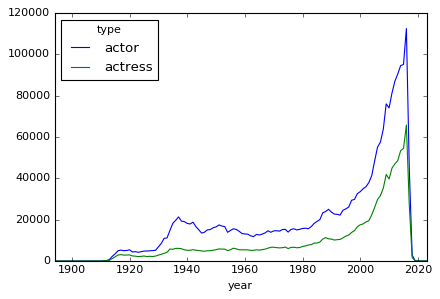

In [36]:
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

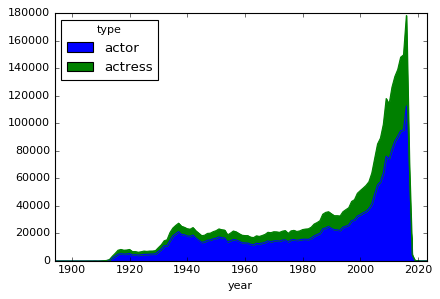

In [38]:
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

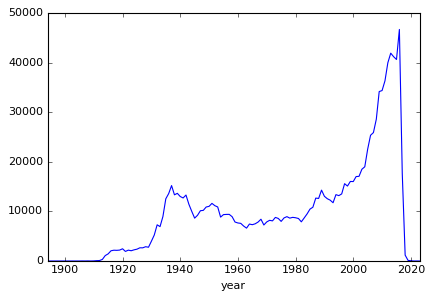

In [52]:
res = c.actor - c.actress
res.plot();

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [53]:
frac = c.actor/(c.actor + c.actress)

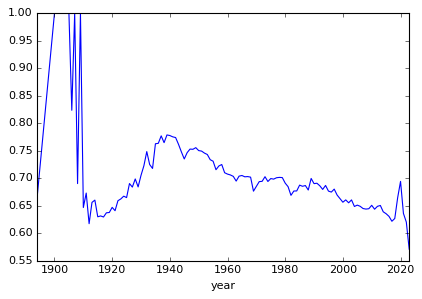

In [55]:
frac.plot();

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [58]:
c = cast[cast.n == 2]
c = c.groupby(['year', 'type']).size().unstack().fillna(0).astype(int)

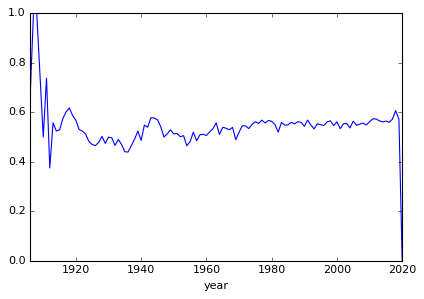

In [61]:
frac2 = c.actor/(c.actor + c.actress)
frac2.plot();

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [ ]:
#From Video

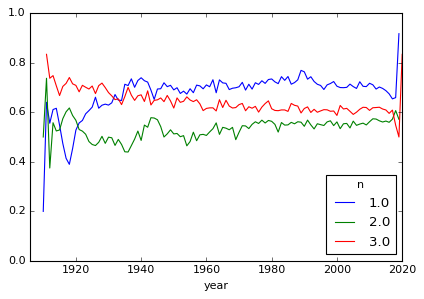

In [9]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
(c.actor/(c.actor + c.actress)).unstack('n').plot(ylim = [0,1])